# Recreating Roelof's PPA Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import nengo

seed = 18945
np.random.seed(seed)

STEP_SIZE = 1   # duration time step in ms
N_STEPs = 2000     # 2000 ms in total
N_CONCEPTs = 5   
N_LEMMAs = 5     
N_MORPHEMEs = 5  
N_PHONEMEs = 10   
N_SYLLABLEs = 5  

N_lesion_values = 100 # for 100 for weight lesion, 66 (!) for decay lesion

N_GROUPs = 4 # Normal, Nonfluent_agrammatic, Semantic_dementia, Logopenic
NORMAL = 0
NONFLUENT_AGRAMMATIC = 1
SEMANTIC_DEMENTIA = 2
LOGOPENIC = 3

N_TASKs = 3 # Naming, Comprehension, Repetition
NAMING = 0
COMPREHENSION = 1
REPETITION = 2

N_ASSESSMENTs = 6
ENGLISH = 0
DUTCH = 1
BRAMBATI_T1 = 2 # baseline 
BRAMBATI_T2 = 3 # follow up 
ROHRERMANDELLI_T1 = 4 # baseline 
ROHRERMANDELLI_T2 = 5 # follow up 

Y = 1.0     # connection present 
N = 0.0     # connection absent

# labeling network nodes
CAT = 0
DOG = 1
MAT = 2
FOG = 3
FISH = 4

pK = 0 # phonemes
pE = 1
pT = 2
pD = 3
pO = 4
pG = 5
pM = 6
pF = 7
pI = 8
pS = 9

Cat = 0
Dog = 1
Mat = 2
Fog = 3
Fish = 4

# connections conceptual network [N_CONCEPTs][N_CONCEPTs]
CC_con =  np.array([
    # CAT   DOG  MAT  FOG  FISH  
    [   N,    Y,   N,   N,    Y ], # CAT
    [   Y,    N,   N,   N,    Y ], # DOG
    [   N,    N,   N,   N,    N ], # MAT
    [   N,    N,   N,   N,    N ], # FOG
    [   Y,    Y,   N,   N,    N ]  # FISH
])

# connections between concept and lemma nodes [N_CONCEPTs][N_LEMMAs]
CL_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between lemma nodes and morpheme nodes [N_LEMMAs][N_MORPHEMEs]
LM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between morpheme nodes and output phoneme nodes [N_MORPHEMEs][N_PHONEMEs]
MP_con = np.array([
     #  K  E  T  D  O  G  M  F  I  S  
    [   Y, Y, Y, N, N, N, N, N, N, N ], # <cat>
    [   N, N, N, Y, Y, Y, N, N, N, N ], # <dog>
    [   N, Y, Y, N, N, N, Y, N, N, N ], # <mat>
    [   N, N, N, N, Y, Y, N, Y, N, N ], # <fog>
    [   N, N, N, N, N, N, N, Y, Y, Y ]  # <fish>
])

# connections between output phoneme nodes and syllable program nodes [N_PHONEMEs][N_SYLLABLEs]
PS_con = np.array([
    # Cat Dog  Mat Fog  Fish
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input and output phoneme nodes [N_PHONEMEs][N_PHONEMEs]
PP_con = np.array([
    # K    E    T   D    O    G   M   F   I  S 
    [ Y,   N,   N,  N,   N,   N,  N,  N,  N, N  ], # K
    [ N,   Y,   N,  N,   N,   N,  N,  N,  N, N  ], # E
    [ N,   N,   Y,  N,   N,   N,  N,  N,  N, N  ], # T
    [ N,   N,   N,  Y,   N,   N,  N,  N,  N, N  ], # D
    [ N,   N,   N,  N,   Y,   N,  N,  N,  N, N  ], # O
    [ N,   N,   N,  N,   N,   Y,  N,  N,  N, N  ], # G
    [ N,   N,   N,  N,   N,   N,  Y,  N,  N, N  ], # M
    [ N,   N,   N,  N,   N,   N,  N,  Y,  N, N  ], # F
    [ N,   N,   N,  N,   N,   N,  N,  N,  Y, N  ], # I
    [ N,   N,   N,  N,   N,   N,  N,  N,  N, Y  ]  # S
])

# connections between input phoneme nodes and input morpheme nodes [N_PHONEMEs][N_MORPHEMEs]
PiM_con = np.array([
    # Cat Dog  Mat Fog  Fish 
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input morpheme and output morpheme nodes [N_MORPHEMEs][N_MORPHEMEs]
iMM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between input morpheme and lemma nodes [N_MORPHEMEs][N_LEMMAs]
iML_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])



In [2]:
# English data on PPA for single word tasks: Savage et al. (2013) [N_GROUPs][N_TASKs]
REAL_DATA_ENGLISH = np.array([
    # Naming  Comprehension Repetition
    [ 88.7,      97.0,      99.7 ], # Control
    [ 78.3,      94.3,      79.7 ], # nfvPPA
    [ 22.7,      63.3,      95.3 ], # svPPA
    [ 41.3,      84.7,      84.7 ]  # lvPPA
])

# Dutch data on PPA for single word tasks: Janssen et al. (2021) [N_GROUPs][N_TASKs]
REAL_DATA_DUTCH = np.array([
    # Naming  Comprehension Repetition */
    [ 90.3,      96.3,      96.7 ], # Control
    [ 77.3,      97.7,      89.3 ], # nfvPPA
    [ 29.0,      78.0,      96.3 ], # svPPA
    [ 66.3,      93.7,      91.3 ]  # lvPPA
])

# Brambati T1 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 85.3,      99.7,      83.7 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA
    [ 69.3,      95.0,      69.0 ]  # lvPPA
])

# Brambati T2 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T2 = np.array([
    # Naming  Comprehension Repetition
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 83.3,      94.8,      68.0 ], # nfvPPA
    [ 19.3,      66.7,      82.3 ], # svPPA
    [ 52.7,      95.0,      58.8 ]  # lvPPA
])

# Rohrer et al. (2013), logopenic patients (N=21), T1 baseline and T2 one year later
# Mandelli et al. (2016), nonfluent/agrammatic patients (N=34), T1 baseline and T2 one year later

# RohrerMandelli T1 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 76.7,      99.0,      81.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 61.0,      94.0,      94.0 ]  # lvPPA
])

# RohrerMandelli T2 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T2 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 66.0,      90.0,      65.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 43.0,      85.0,      77.0 ]  # lvPPA
])



In [3]:
# unscaled rate constants
SEM = 0.0101
LEM = 0.0074
LEX = 0.0120
DECAY = 0.0240
EXT = 0.1965

# parameter values
CYCLE_TIME = 25                 # ms per link 
SEM_rate = SEM * STEP_SIZE   # prop per step_size ms 
LEM_rate = LEM * STEP_SIZE   # prop per step_size ms 
LEX_rate = LEX * STEP_SIZE   # prop per step_size ms 
DECAY_rate = DECAY * STEP_SIZE # prop per step_size ms 
EXTIN = EXT * STEP_SIZE      # act_units per step_size ms 
LEMLEXFRAC = 0.3 
# fraction of LEX_rate spread between lemmas and output morphemes 
# implementing weak cascading of activation, see Roelofs (2008, JEP:LMC) 

FR = 0.10  # fraction of connection weight for input phoneme to input morpheme, cf. Roelofs (1997, Cognition)
SEGMENT_DURATION = 125  # ms
PICTURE_DURATION = 125  # ms

# set here to simulate weight or decay lesion and what to print 
WEIGHT_LESION = 1
DECAY_LESION = 0

SHOW_RESULTS_ALL_VALUES = 0 # set here whether to print all values 



In [4]:
# nengo settings

N_NEURONS = 500 # num neurons in a pop
DIM = 1 # dimensions
T = 2
CYCLE_TIME_NENGO = 0.025 
PICTURE_DURATION_NENGO = 0.125
SEGMENT_DURATION_NENGO = 0.125
tau = 0.01


### Model Definition

In [46]:
class Model:
    def __init__(
        self,
        CC_con = CC_con,
        CL_con = CL_con,
        LM_con = LM_con,
        MP_con = MP_con,
        PS_con = PS_con,
        PP_con = PP_con,
        PiM_con = PiM_con,
        iMM_con = iMM_con,
        iML_con = iML_con,
    ):
        
        self.CC_con = CC_con
        self.CL_con = CL_con
        self.LM_con = LM_con
        self.MP_con = MP_con
        self.PS_con = PS_con
        self.PP_con = PP_con
        self.PiM_con = PiM_con
        self.iMM_con = iMM_con
        self.iML_con = iML_con
        
        self.REAL_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)
        
        self.WEIGHT_value = np.zeros(N_lesion_values)
        self.DECAY_value = np.zeros(N_lesion_values)
        
        # concept and lemma
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        # output form 
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        # input form 
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)

        # input buffer for nodes 
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        # Aphasia parameters

        # weight lesion 
        self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 0.0 # connections to/from output phonemes 
        self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 0.0 # connections to/within/from conceptual network
        self.CONNECTION_DECREASE_LOGOPENIC = 0.0 # connections to/from lexical output forms, and b/w input/output phonemes
        
        # decay lesion
        self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 0.0 # output phonemes 
        self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 0.0 # concepts
        self.DECAY_INCREASE_LOGOPENIC = 0.0 # lexical output forms
        
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target concept, cat
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of conceptual relative, dog
        self.ACT_CR= np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target lemma, cat
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of lemma relative, i.e., semantically related, dog
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target syllable, cat
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of syllabic relative, mat
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
        # T = target, R = relative
        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
    
    def get_input_C(self):
        ext_input_C = lambda t: self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXT if t <= CYCLE_TIME_NENGO else (EXT*(self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA + 1) if t <= PICTURE_DURATION_NENGO else (EXT if t <= (CYCLE_TIME_NENGO + PICTURE_DURATION_NENGO) else 0.0))
        return ext_input_C
    

    def get_input_iP(self):
        # phonetic inputs for comprehension and repetition tasks  
        ext_input_iP_pK = lambda t: EXT if t <= SEGMENT_DURATION_NENGO else 0.0
        ext_input_iP_pE = lambda t: 0.0 if t <= SEGMENT_DURATION_NENGO else (EXT if t <= 2*SEGMENT_DURATION_NENGO else 0.0)
        ext_input_iP_pT = lambda t: 0.0 if t <= 2*SEGMENT_DURATION_NENGO else (EXT if t <= 3*SEGMENT_DURATION_NENGO else 0.0) 
        
        return ext_input_iP_pK, ext_input_iP_pE, ext_input_iP_pT
        
        
    def nengo_model(self, lesion_value, group, task):
        model = nengo.Network(seed = seed)
        
        with model:
            
            ### CONCEPTS
            
            # create concept ensembles
            C_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=22)
            C_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=22)
            C_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=22)
            C_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=22)
            C_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=22)
            
            # connection from input
            Bp = tau/0.001
            
            # input for naming task
            if task == NAMING:
                input_func_cat = self.get_input_C()
                cat_input = nengo.Node(input_func_cat)
                nengo.Connection(cat_input, C_cat_ens, synapse=tau, transform=Bp)
            
            # connections b/w concepts
            
            # recurrent connections
            # self.C_node_act = self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)) + self.input_C
            Ap_C = 1.0 - tau * (DECAY/0.001 * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)
            nengo.Connection(C_cat_ens, C_cat_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_dog_ens, C_dog_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_mat_ens, C_mat_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_fog_ens, C_fog_ens, synapse=tau, transform=Ap_C)
            nengo.Connection(C_fish_ens, C_fish_ens, synapse=tau, transform=Ap_C)
            
            # relation connections
            # self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))
            CC_con_val = tau * SEM/0.001 * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA
            nengo.Connection(C_cat_ens, C_dog_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_dog_ens, C_cat_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_cat_ens, C_fish_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_fish_ens, C_cat_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_dog_ens, C_fish_ens, synapse=tau, transform=CC_con_val)
            nengo.Connection(C_fish_ens, C_dog_ens, synapse=tau, transform=CC_con_val)
            
            ###  LEMMAS
            
            # create lemma ensembles
            L_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=6)
            L_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=6)
            L_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=6)
            L_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=6)
            L_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=6)
            
            # connections between lemmas
            
            # recurrent connections
            # self.L_node_act = self.L_node_act * (1.0 - DECAY_rate) + self.input_L
            Ap_L = 1.0 - tau * DECAY/0.001
            nengo.Connection(L_cat_ens, L_cat_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_dog_ens, L_dog_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_mat_ens, L_mat_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_fog_ens, L_fog_ens, synapse=tau, transform=Ap_L)
            nengo.Connection(L_fish_ens, L_fish_ens, synapse=tau, transform=Ap_L)
            
            # relation connections
            # self.input_C[i] += (self.L_node_act[j] * self.CL_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)
            CL_con_val = tau * LEM/0.001 * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA
            nengo.Connection(L_cat_ens, C_cat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_dog_ens, C_dog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_mat_ens, C_mat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_fog_ens, C_fog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(L_fish_ens, C_fish_ens, synapse=tau, transform=CL_con_val)
            # self.input_L[i] += (self.C_node_act[j] * self.CL_con[j][i] *  self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)
            nengo.Connection(C_cat_ens, L_cat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_dog_ens, L_dog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_mat_ens, L_mat_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_fog_ens, L_fog_ens, synapse=tau, transform=CL_con_val)
            nengo.Connection(C_fish_ens, L_fish_ens, synapse=tau, transform=CL_con_val)
            
            ### MORPHEMES
            
            # create input morpheme ensembles
            iM_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            iM_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            iM_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            iM_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            iM_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            # create output morpheme ensembles
            M_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            M_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            M_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            M_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            M_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=1)
            
            # connections b/w morphemes
            
            # recurrent connections
            # self.iM_node_act = self.iM_node_act * (1.0 - DECAY_rate) + self.input_iM
            Ap_iM = 1.0 - tau * DECAY/0.001
            nengo.Connection(iM_cat_ens, iM_cat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_dog_ens, iM_dog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_mat_ens, iM_mat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_fog_ens, iM_fog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(iM_fish_ens, iM_fish_ens, synapse=tau, transform=Ap_iM)
            # self.M_node_act = self.M_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_LOGOPENIC)) + self.input_M
            Ap_M = 1.0 - tau * (DECAY/0.001 * self.DECAY_INCREASE_LOGOPENIC)
            nengo.Connection(M_cat_ens, M_cat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_dog_ens, M_dog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_mat_ens, M_mat_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_fog_ens, M_fog_ens, synapse=tau, transform=Ap_iM)
            nengo.Connection(M_fish_ens, M_fish_ens, synapse=tau, transform=Ap_iM)
            
            # relation connections
            # self.input_L[i] += (self.iM_node_act[j] * self.iML_con[j][i])
            iML_con_val = tau * LEX / 0.001
            nengo.Connection(iM_cat_ens, L_cat_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_dog_ens, L_dog_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_mat_ens, L_mat_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_fog_ens, L_fog_ens, synapse=tau, transform=iML_con_val)
            nengo.Connection(iM_fish_ens, L_fish_ens, synapse=tau, transform=iML_con_val)
            # self.input_M[i] += (self.L_node_act[j] * LEMLEXFRAC * self.LM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)
            LM_con_val = tau * LEMLEXFRAC * LEX/0.001 * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(L_cat_ens, M_cat_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_dog_ens, M_dog_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_mat_ens, M_mat_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_fog_ens, M_fog_ens, synapse=tau, transform=LM_con_val)
            nengo.Connection(L_fish_ens, M_fish_ens, synapse=tau, transform=LM_con_val)
            # self.input_M[i] += (self.iM_node_act[j] * self.iMM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)
            iMM_con_val = tau * LEX/0.001 * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(iM_cat_ens, M_cat_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_dog_ens, M_dog_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_mat_ens, M_mat_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_fog_ens, M_fog_ens, synapse=tau, transform=iMM_con_val)
            nengo.Connection(iM_fish_ens, M_fish_ens, synapse=tau, transform=iMM_con_val)
            
            ### PHONEMES
            
            # create input phoneme ensembles
            #  K  E  T  D  O  G  M  F  I  S 
            iP_K_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_E_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_T_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_D_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_O_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_G_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_M_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_F_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_I_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            iP_S_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=10)
            # create output phoneme ensembles
            oP_K_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_E_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_T_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_D_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_O_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_G_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_M_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_F_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_I_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            oP_S_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=5)
            
            # input for naming task
            if task == COMPREHENSION or task == REPETITION:
                input_func_pK, input_func_pE, input_func_pT = self.get_input_iP()
                pK_input = nengo.Node(input_func_pK)
                pE_input = nengo.Node(input_func_pE)
                pT_input = nengo.Node(input_func_pT)
                nengo.Connection(pK_input, iP_K_ens, synapse=tau, transform=Bp)
                nengo.Connection(pE_input, iP_E_ens, synapse=tau, transform=Bp)
                nengo.Connection(pT_input, iP_T_ens, synapse=tau, transform=Bp)
            
            # connections b/w phonemes
            
            # recurrent connections
            # self.oP_node_act = self.oP_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)) + self.input_oP
            Ap_oP = 1.0 - tau * (DECAY/0.001 * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)
            nengo.Connection(oP_K_ens, oP_K_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_E_ens, oP_E_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_T_ens, oP_T_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_D_ens, oP_D_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_O_ens, oP_O_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_G_ens, oP_G_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_M_ens, oP_M_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_F_ens, oP_F_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_I_ens, oP_I_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(oP_S_ens, oP_S_ens, synapse=tau, transform=Ap_oP)
            # self.iP_node_act = self.iP_node_act * (1.0 - DECAY_rate) + self.input_iP
            Ap_oP = 1.0 - tau * DECAY/0.001
            nengo.Connection(iP_K_ens, iP_K_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_E_ens, iP_E_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_T_ens, iP_T_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_D_ens, iP_D_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_O_ens, iP_O_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_G_ens, iP_G_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_M_ens, iP_M_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_F_ens, iP_F_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_I_ens, iP_I_ens, synapse=tau, transform=Ap_oP)
            nengo.Connection(iP_S_ens, iP_S_ens, synapse=tau, transform=Ap_oP)
            
            # relation connections
            # self.input_oP[i] += (self.M_node_act[j] * self.MP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            MP_con_val = tau * LEX/0.001 * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(M_cat_ens, oP_K_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_cat_ens, oP_E_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_cat_ens, oP_T_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_D_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_O_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_dog_ens, oP_G_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_M_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_E_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_mat_ens, oP_T_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_F_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_O_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fog_ens, oP_G_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_F_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_I_ens, synapse=tau, transform=MP_con_val)
            nengo.Connection(M_fish_ens, oP_S_ens, synapse=tau, transform=MP_con_val)
            # self.input_oP[i] += (self.iP_node_act[j] * self.PP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            PP_con_val = tau * LEX/0.001 * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC
            nengo.Connection(iP_K_ens, oP_K_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_E_ens, oP_E_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_T_ens, oP_T_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_D_ens, oP_D_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_O_ens, oP_O_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_G_ens, oP_G_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_M_ens, oP_M_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_F_ens, oP_F_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_I_ens, oP_I_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(iP_S_ens, oP_S_ens, synapse=tau, transform=PP_con_val)
            # self.input_iP[i] += (self.oP_node_act[j] * self.PP_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)
            nengo.Connection(oP_K_ens, iP_K_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_E_ens, iP_E_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_T_ens, iP_T_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_D_ens, iP_D_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_O_ens, iP_O_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_G_ens, iP_G_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_M_ens, iP_M_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_F_ens, iP_F_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_I_ens, iP_I_ens, synapse=tau, transform=PP_con_val)
            nengo.Connection(oP_S_ens, iP_S_ens, synapse=tau, transform=PP_con_val)
            # self.input_iM[i] += (self.iP_node_act[j] * self.PiM_con[j][i])
            PiM_con_val = tau * FR * LEX/0.001
            nengo.Connection(iP_K_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_E_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_T_ens, iM_cat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_D_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_O_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_G_ens, iM_dog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_M_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_E_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_T_ens, iM_mat_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_F_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_O_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_G_ens, iM_fog_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_F_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_I_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            nengo.Connection(iP_S_ens, iM_fish_ens, synapse=tau, transform=PiM_con_val)
            
            ### SYLLABLE PROGRAMS
            
            # create syllable program ensembles
            S_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=4)
            S_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=4)
            S_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=4)
            S_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=4)
            S_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, radius=4)
            
            # connections b/w syllable programs
            
            # recurrent connections
            # self.S_node_act = self.S_node_act * (1.0 - DECAY_rate) + self.input_S
            Ap_S = 1.0 - tau * DECAY/0.001
            nengo.Connection(S_cat_ens, S_cat_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_dog_ens, S_dog_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_mat_ens, S_mat_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_fog_ens, S_fog_ens, synapse=tau, transform=Ap_S)
            nengo.Connection(S_fish_ens, S_fish_ens, synapse=tau, transform=Ap_S)
            
            # relation connections
            # self.input_S[i] += (self.oP_node_act[j] * self.PS_con[j][i] * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC)
            PS_con_val = tau * LEX/0.001 * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC
            nengo.Connection(oP_K_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_E_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_T_ens, S_cat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_D_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_O_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_G_ens, S_dog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_M_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_E_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_T_ens, S_mat_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_F_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_O_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_G_ens, S_fog_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_F_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_I_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            nengo.Connection(oP_S_ens, S_fish_ens, synapse=tau, transform=PS_con_val)
            
            # probes
            if task == NAMING:
                probe_in = nengo.Probe(cat_input)
                
            if task == COMPREHENSION or task == REPETITION:
                probe_in = nengo.Probe(pK_input)
                
            probe_C = nengo.Probe(C_cat_ens, synapse=tau)
            probe_S = nengo.Probe(S_cat_ens, synapse=tau)
            probe_CT = nengo.Probe(C_cat_ens, synapse=tau)
            probe_CR = nengo.Probe(C_dog_ens, synapse=tau)
            probe_LT = nengo.Probe(L_cat_ens, synapse=tau)
            probe_LR = nengo.Probe(L_dog_ens, synapse=tau)
            probe_ST = nengo.Probe(S_cat_ens, synapse=tau)
            probe_SR = nengo.Probe(S_mat_ens, synapse=tau)
            
        with nengo.Simulator(model, progress_bar=False) as sim:
            sim.run(T)
            t = sim.trange()
            x = sim.data[probe_in]
            x_C = sim.data[probe_C]
            x_S = sim.data[probe_S]
            x_CT = sim.data[probe_CT]
            x_CR = sim.data[probe_CR]
            x_LT = sim.data[probe_LT]
            x_LR = sim.data[probe_LR]
            x_ST = sim.data[probe_ST]
            x_SR = sim.data[probe_SR]
            
        # saving activation of critical nodes
        self.ACT_C[lesion_value, :, group, task] = x_C.flatten()
        self.ACT_S[lesion_value, :, group, task] = x_S.flatten()
        self.ACT_CT[lesion_value, :, group, task] = x_CT.flatten()
        self.ACT_CR[lesion_value, :, group, task] = x_CR.flatten()
        self.ACT_LT[lesion_value, :, group, task] = x_LT.flatten()
        self.ACT_LR[lesion_value, :, group, task] = x_LR.flatten()
        self.ACT_ST[lesion_value, :, group, task] = x_ST.flatten()
        self.ACT_SR[lesion_value, :, group, task] = x_SR.flatten()
            
        return t, x, x_C
                    
                    
    def set_spreading_rates(self):
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        self.CC_con *= SEM_rate
        self.CL_con *= LEM_rate
        self.LM_con *= LEX_rate
        self.MP_con *= LEX_rate
        self.PS_con *= LEX_rate

        # connections for input phonemes to output phonemes, input morphemes, input morphemes to lemmas

        self.PP_con *= LEX_rate
        self.PiM_con *= (FR * LEX_rate)
        self.iMM_con *= LEX_rate
        self.iML_con *= LEX_rate
        
        
    def reset_network(self):
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        
        
    def set_aphasic_parameters(self, group, lesion_value):
        WEIGHT_FACTOR, DECAY_FACTOR = 0.0, 0.0

        if WEIGHT_LESION:
            WEIGHT_FACTOR = self.WEIGHT_value[lesion_value]  
        else:
            WEIGHT_FACTOR = 1.0

        if DECAY_LESION:
            DECAY_FACTOR = self.DECAY_value[lesion_value]   
        else:
            DECAY_FACTOR = 1.0


        # setting of weight parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal 

        if group == SEMANTIC_DEMENTIA:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.CONNECTION_DECREASE_LOGOPENIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_LOGOPENIC = 1.0 # normal

        # setting of decay parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal

        if group == SEMANTIC_DEMENTIA:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.DECAY_INCREASE_LOGOPENIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_LOGOPENIC = 1.0 # normal
            

    def print_heading(self):
        print("\n")
        print("WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs\n")
        print("Simulation of group studies \n")
        
        
    def print_parameters(self):
        print("Parameter values:\n")
        print(f"cycle time : {CYCLE_TIME : 6d} [ms]\n")
        print(f"sem_rate   : {SEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"lem_rate   : {LEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"exin       : {EXTIN/STEP_SIZE : .4f} [act_units/ms]\n")
        print(f"d          : {DECAY_rate/STEP_SIZE : .4f} [prop/ms]\n")
    

    def main(self):
        ls = 0.0 # exact lesion value 

        self.print_heading()
        self.print_parameters()
        self.set_spreading_rates()

        if WEIGHT_LESION:
            ls = 0.0
            for lesion_value in range(N_lesion_values):
                # values between maximally damaged, 0.0, and minimally damaged, 0.99
                self.WEIGHT_value[lesion_value] = ls 
                ls += 0.01

        if DECAY_LESION:
             # values between minimally damaged, 1.01, and maximally damaged, i.e., full decay, 1.66
            ls = 1.01
            for lesion_value in range(N_lesion_values):
                self.DECAY_value[lesion_value] = ls
                ls += 0.01
                
        
        # running plotting code
        fig, axs = plt.subplots(3, 3, figsize=(12, 6))
        
        """
        NORMAL = 0
        NONFLUENT_AGRAMMATIC = 1
        SEMANTIC_DEMENTIA = 2
        LOGOPENIC = 3
        """
        
        group = NORMAL
        task = NAMING
        lesion_value = 20
        
        print('Naming...')
        self.reset_network()
        self.set_aphasic_parameters(group, lesion_value)
        self.nengo_model(lesion_value, group, task)
        
        axs[0, 0].plot(self.ACT_CT[lesion_value, :, group, task], label='Target', color='k')
        axs[0, 0].plot(self.ACT_CR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[0, 0].legend()
        axs[0, 0].set_xlim([0, 2000])
        axs[0, 0].set_ylim([0, None])
        axs[0, 0].set_ylabel('Activation')
        axs[0, 0].set_title('Concepts (Naming)')
        axs[1, 0].plot(self.ACT_LT[lesion_value, :, group, task], label='Target', color='k')
        axs[1, 0].plot(self.ACT_LR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[1, 0].legend()
        axs[1, 0].set_xlim([0, 2000])
        axs[1, 0].set_ylim([0, None])
        axs[1, 0].set_ylabel('Activation')
        axs[1, 0].set_title('Lemmas (Naming)')
        axs[2, 0].plot(self.ACT_ST[lesion_value, :, group, task], label='Target', color='k')
        axs[2, 0].plot(self.ACT_SR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[2, 0].legend()
        axs[2, 0].set_xlim([0, 2000])
        axs[2, 0].set_ylim([0, None])
        axs[2, 0].set_title('Syllable Programs (Naming)')
        axs[2, 0].set_xlabel('Time (ms)')
        axs[2, 0].set_ylabel('Activation')
        
        print('Comprehension...')
        task = COMPREHENSION
        self.reset_network()
        self.set_aphasic_parameters(group, lesion_value)
        self.nengo_model(lesion_value, group, task)
        
        axs[0, 1].plot(self.ACT_CT[lesion_value, :, group, task], label='Target', color='k')
        axs[0, 1].plot(self.ACT_CR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[0, 1].legend()
        axs[0, 1].set_xlim([0, 2000])
        axs[0, 1].set_ylim([0, None])
        axs[0, 1].set_title('Concepts (Comprehension)')
        axs[1, 1].plot(self.ACT_LT[lesion_value, :, group, task], label='Target', color='k')
        axs[1, 1].plot(self.ACT_LR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[1, 1].legend()
        axs[1, 1].set_xlim([0, 2000])
        axs[1, 1].set_ylim([0, None])
        axs[1, 1].set_title('Lemmas (Comprehension)')
        axs[2, 1].plot(self.ACT_ST[lesion_value, :, group, task], label='Target', color='k')
        axs[2, 1].plot(self.ACT_SR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[2, 1].legend()
        axs[2, 1].set_xlim([0, 2000])
        axs[2, 1].set_ylim([0, None])
        axs[2, 1].set_title('Syllable Programs (Comprehension)')
        axs[2, 1].set_xlabel('Time (ms)')
        
        print('Repetition...')
        task = REPETITION
        self.reset_network()
        self.set_aphasic_parameters(group, lesion_value)
        self.nengo_model(lesion_value, group, task)
        
        axs[0, 2].plot(self.ACT_CT[lesion_value, :, group, task], label='Target', color='k')
        axs[0, 2].plot(self.ACT_CR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[0, 2].legend()
        axs[0, 2].set_xlim([0, 2000])
        axs[0, 2].set_ylim([0, None])
        axs[0, 2].set_title('Concepts (Repetition)')
        axs[1, 2].plot(self.ACT_LT[lesion_value, :, group, task], label='Target', color='k')
        axs[1, 2].plot(self.ACT_LR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[1, 2].legend()
        axs[1, 2].set_xlim([0, 2000])
        axs[1, 2].set_ylim([0, None])
        axs[1, 2].set_title('Lemmas (Repetition)')
        axs[2, 2].plot(self.ACT_ST[lesion_value, :, group, task], label='Target', color='k')
        axs[2, 2].plot(self.ACT_SR[lesion_value, :, group, task], label='Relative', color='gray')
        axs[2, 2].legend()
        axs[2, 2].set_xlim([0, 2000])
        axs[2, 2].set_ylim([0, None])
        axs[2, 2].set_title('Syllable Programs (Repetition)')
        axs[2, 2].set_xlabel('Time (ms)')
            
        fig.tight_layout()
        plt.show()

        print('Finished.')
        
        



WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs

Simulation of group studies 

Parameter values:

cycle time :     25 [ms]

sem_rate   :  0.0101 [prop/ms]

lem_rate   :  0.0074 [prop/ms]

exin       :  0.1965 [act_units/ms]

d          :  0.0240 [prop/ms]

Naming...
Comprehension...
Repetition...


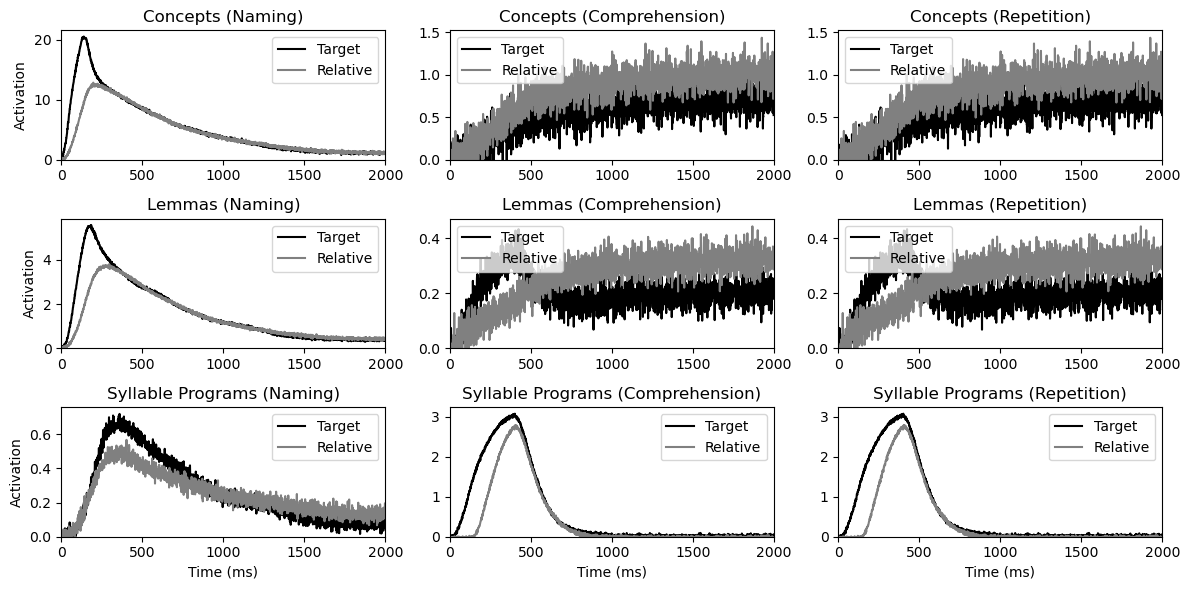

Finished.


In [47]:
m = Model()
m.main()